# K-Nearest Neighbors (KNN)


### Application
In this part, we apply K-Nearest Neighbors algorithm on the red wine dataset, this dataset comes from UCI.

In [2]:
import numpy as np
import pandas as pd
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
import warnings
warnings.filterwarnings('ignore')

In [3]:
wine = pd.read_csv('winequality-red.csv', sep=';', error_bad_lines=False, engine='python') # type: ignore
wine = datasets.load_wine()
X = wine.data
y = wine.target

Firstly, we have a look at summary of our dataset. According to the result, we could see there is no missing data and the features are all positive.

In [4]:
print(pd.DataFrame(X).describe())

               0           1           2           3           4           5   \
count  178.000000  178.000000  178.000000  178.000000  178.000000  178.000000   
mean    13.000618    2.336348    2.366517   19.494944   99.741573    2.295112   
std      0.811827    1.117146    0.274344    3.339564   14.282484    0.625851   
min     11.030000    0.740000    1.360000   10.600000   70.000000    0.980000   
25%     12.362500    1.602500    2.210000   17.200000   88.000000    1.742500   
50%     13.050000    1.865000    2.360000   19.500000   98.000000    2.355000   
75%     13.677500    3.082500    2.557500   21.500000  107.000000    2.800000   
max     14.830000    5.800000    3.230000   30.000000  162.000000    3.880000   

               6           7           8           9           10          11  \
count  178.000000  178.000000  178.000000  178.000000  178.000000  178.000000   
mean     2.029270    0.361854    1.590899    5.058090    0.957449    2.611685   
std      0.998859    0.1244

We could determine the number of wine types in the dataset as well as the quantity of samples in each specific type. Based on the findings, it is evident that there are three variations of red wine, with 59, 71, and 71 samples respectively for each type.

In [5]:
print(Counter(y))

Counter({1: 71, 0: 59, 2: 48})


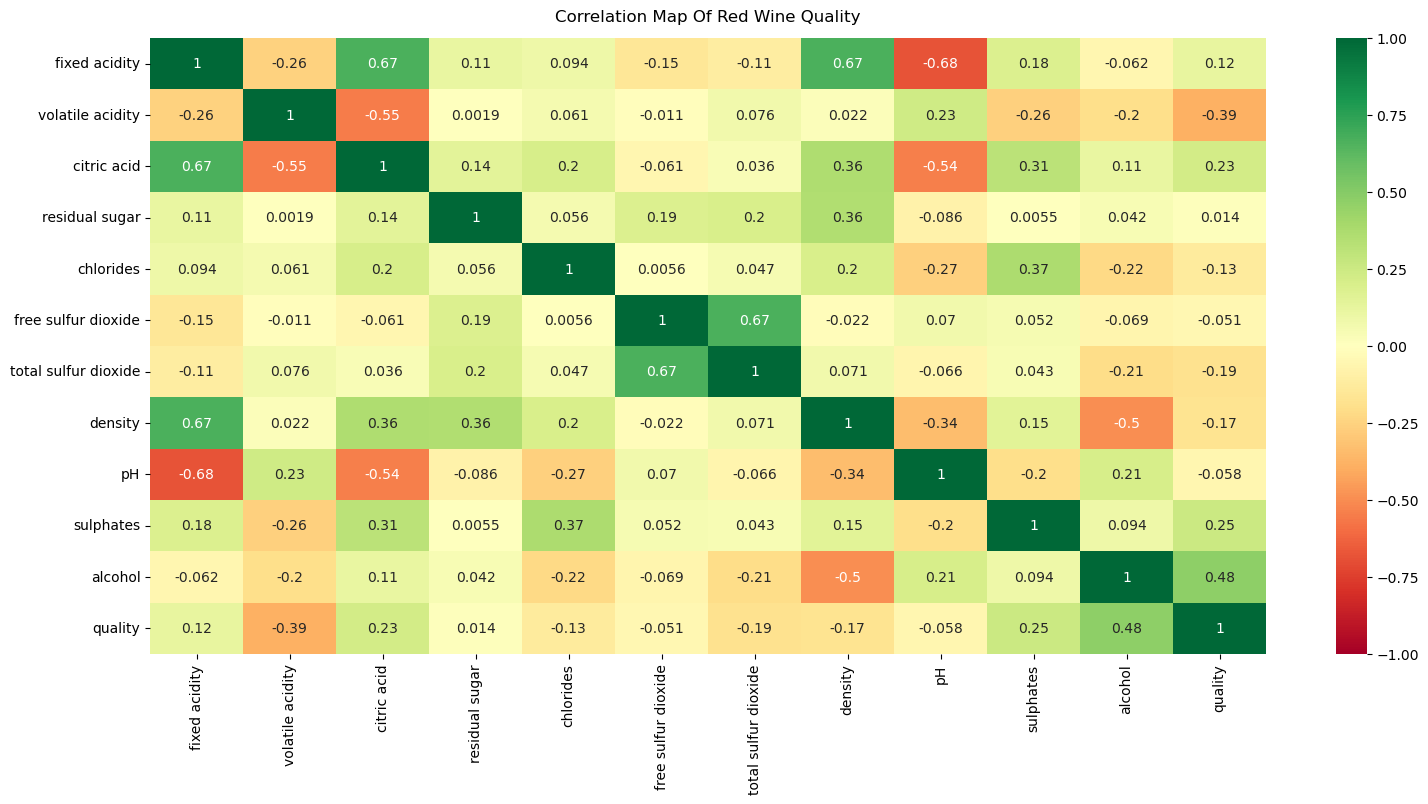

In [6]:
plt.figure(figsize=(18, 8))
wine1 = pd.read_csv('winequality-red.csv', sep=';', error_bad_lines=False, engine='python') # type: ignore
sns.heatmap(wine1.corr(), vmin=-1, vmax=1, annot=True, cmap='RdYlGn')
plt.title('Correlation Map Of Red Wine Quality', fontdict={'fontsize':12}, pad=12);

We then visualized the first and second characteristics to see if there were any obvious clusters between the three wines. According to the plot, we could see that there exists three clusters, however, the boundaries are not clear.

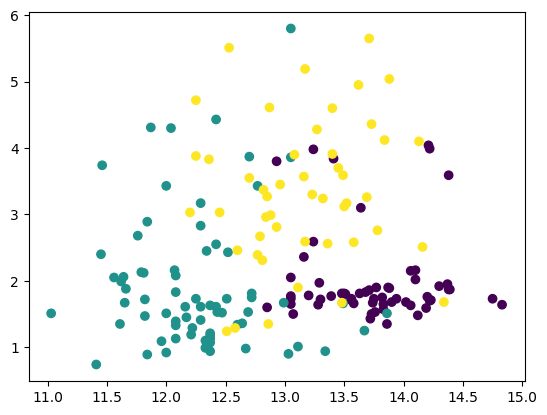

In [7]:
plt.scatter(X[:, 0], X[:,1],c=y)
plt.show()

We could also make scatter plot of different columns. The first plot contains more correlated variables, then there exists more significant clusters, while the second plot's clusters are not so significant.

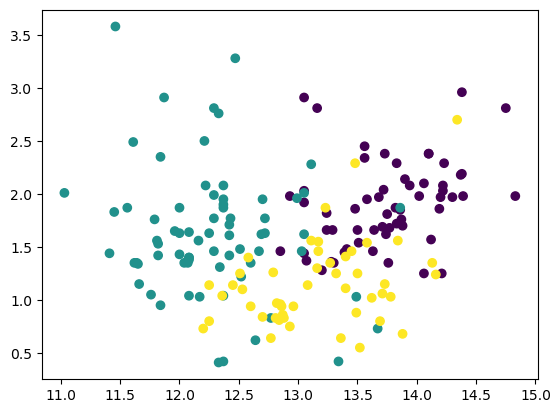

In [99]:
plt.scatter(X[:, 0], X[:,8],c=y)
plt.show()

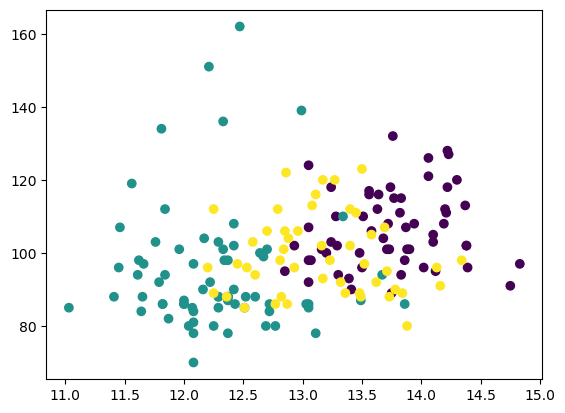

In [97]:
plt.scatter(X[:, 0], X[:,4],c=y)
plt.show()

Then we build our K-Nearest Neighbors model.

In [42]:
def knn_classifier_and_regressor(train_input, train_output, new_point, k, classifier=True):
    n = train_input.shape[0]
    distance = np.zeros(n)
    
    # Distance function
    for i in range(n):
        distance[i] = np.linalg.norm(train_input[i,:] - new_point)
    
    top_k_neighbors = np.argsort(distance)[:k]
    k_neighbor_output = train_output[top_k_neighbors]
    
    if classifier:
        voters = Counter(k_neighbor_output)
        knn_result = voters.most_common(1)[0][0]
    
    else:
        knn_result = np.mean(k_neighbor_output)
    
    return knn_result

Apply our model on the red wine dataset with all variables, we could see the prediction accuracy is .685, which is not high. The former plot reminds us to choose variables to increase accuracy.

In [100]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=24, stratify=y)

predictions = [knn_classifier_and_regressor(X_train, 
                                          y_train, 
                                          new_point, 
                                          k=5,
                                          classifier=True)
              for new_point in X_test]

accuracy_rate = np.sum(predictions==y_test)/len(y_test)
error_rate = 1-np.sum(predictions==y_test)/len(y_test)
print(f"The prediction accuracy is: {round(accuracy_rate, 3)}")
print(f"The prediction error rate is: {round(error_rate, 3)}")

The prediction accuracy is: 0.685
The prediction error rate is: 0.315


We could choose the first two columns of dataset 'fixed acidity' and 'volatile acidity' as our variables. The prediction accuracy increases to .87.

In [101]:
X_train, X_test, y_train, y_test = train_test_split(X[:, 0:2], y, test_size=0.3, random_state=24, stratify=y)

predictions = [knn_classifier_and_regressor(X_train, 
                                          y_train, 
                                          new_point, 
                                          k=5,
                                          classifier=True)
              for new_point in X_test]

accuracy_rate = np.sum(predictions==y_test)/len(y_test)
error_rate = 1-np.sum(predictions==y_test)/len(y_test)
print(f"The prediction accuracy is: {round(accuracy_rate, 3)}")
print(f"The prediction error rate is: {round(error_rate, 3)}")

The prediction accuracy is: 0.87
The prediction error rate is: 0.13


We could also choose the first column and the ninth column of dataset as our variables. The prediction accuracy increases to .852.

In [103]:
X_train, X_test, y_train, y_test = train_test_split(X[:, [0,8]], y, test_size=0.3, random_state=24, stratify=y)

predictions = [knn_classifier_and_regressor(X_train, 
                                          y_train, 
                                          new_point, 
                                          k=5,
                                          classifier=True)
              for new_point in X_test]

accuracy_rate = np.sum(predictions==y_test)/len(y_test)
error_rate = 1-np.sum(predictions==y_test)/len(y_test)
print(f"The prediction accuracy is: {round(accuracy_rate, 3)}")
print(f"The prediction error rate is: {round(error_rate, 3)}")

The prediction accuracy is: 0.852
The prediction error rate is: 0.148


Since the ranges of different features vary, then we could try to scale the dataset to explore the efficiency of this data processing method.

In [54]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

We first use two variables 'fixed acidity' and 'volatile acidity' on the scaled dataset to make classification. According to the result, we could see it makes slightly decrease.

In [83]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled[:, 0:2], y, test_size=0.3, random_state=24, stratify=y)

predictions = [knn_classifier_and_regressor(X_train, 
                                          y_train, 
                                          new_point, 
                                          k=5,
                                          classifier=True)
              for new_point in X_test]

accuracy_rate = np.sum(predictions==y_test)/len(y_test)
error_rate = 1 - np.sum(predictions==y_test)/len(y_test)
print(f"The prediction accuracy is: {round(accuracy_rate, 3)}")
print(f"The prediction error rate is: {round(error_rate, 3)}")

The prediction accuracy is: 0.852
The prediction error rate is: 0.148


Then we apply all variables to make prediction on the scaled dataset. We could see the prediction accuracy increases a lot. According to this exploration, we could learn that scaling data is necessary, and it efficiently increase the prediction accuracy.

In [85]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=24, stratify=y)

predictions = [knn_classifier_and_regressor(X_train, 
                                          y_train, 
                                          new_point, 
                                          k=5,
                                          classifier=True)
              for new_point in X_test]

accuracy_rate = np.sum(predictions==y_test)/len(y_test)
error_rate = 1-np.sum(predictions==y_test)/len(y_test)
print(f"The prediction accuracy is: {round(accuracy_rate, 3)}")
print(f"The prediction error rate is: {round(error_rate, 3)}")

The prediction accuracy is: 0.981
The prediction error rate is: 0.019


### How to determine $k$ in K-Nearest Neighbors method?

$k$ is vital in this algorithm, in this part, we explore how $k$ affect the accuracy of the model.

In [58]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=24, stratify=y)

n_train = X_train.shape[0]

accuracy_list = []
for k in range(1, n_train+1):
    predictions = [knn_classifier_and_regressor(X_train, 
                                          y_train, 
                                          new_point, 
                                          k=k,
                                          classifier=True)
              for new_point in X_test]

    accuracy_rate = np.sum(predictions==y_test)/len(y_test)
    accuracy_list.append(accuracy_rate)

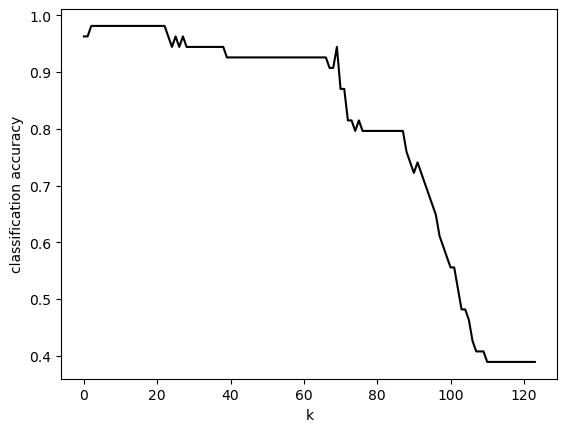

In [62]:
plt.plot(accuracy_list, c='k')
plt.xlabel('k')
plt.ylabel('classification accuracy')
plt.show()

According to the plot, we could see this model has a good performance when $k<20$, then the accuracy decreases.

We could also plot the error rate.

In [90]:
error_list = []
for k in range(1, n_train+1):
    predictions = [knn_classifier_and_regressor(X_train, 
                                          y_train, 
                                          new_point, 
                                          k=k,
                                          classifier=True)
              for new_point in X_test]

    error_rate = 1-np.sum(predictions==y_test)/len(y_test)
    error_list.append(error_rate)

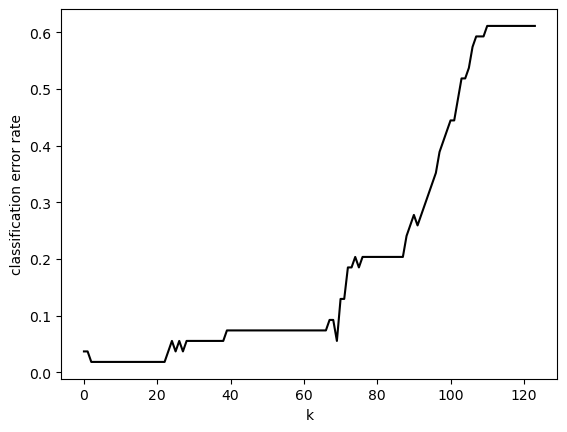

In [91]:
plt.plot(error_list, c='k')
plt.xlabel('k')
plt.ylabel('classification error rate')
plt.show()

### Improvement

To make improvement of the model, we could apply some variable selection method like forward or backward selection to make simpler model.